In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [45]:
fasted_base = "data_controlled_temp/fasted/"
satiated_base = "data_controlled_temp/satiated/"


In [46]:
def get_data(base):
    data = []
    for filename in sorted(os.listdir(base)):
        data.append(np.loadtxt(base + filename, skiprows=1, delimiter=','))
    return data


In [47]:
fasted_data = get_data(fasted_base)
satiated_data = get_data(satiated_base)


In [48]:
print(fasted_data[0].shape, satiated_data[0].shape)


(200, 19) (200, 19)


In [49]:
all_fasted_data = np.concatenate(fasted_data)
all_satiated_data = np.concatenate(satiated_data)

all_data = np.concatenate((all_fasted_data, all_satiated_data))

print(all_fasted_data.shape, all_satiated_data.shape, all_data.shape)


(1000, 19) (1000, 19) (2000, 19)


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(all_data)


PCA(n_components=2)

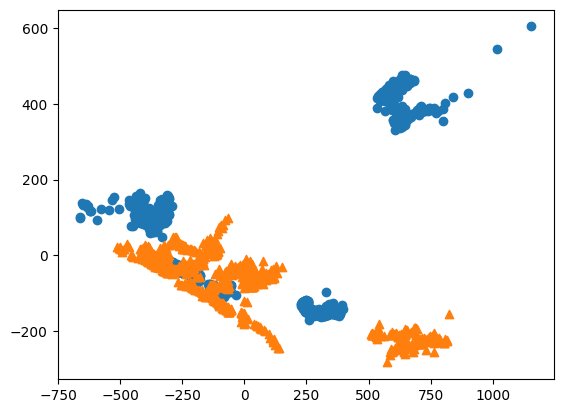

In [51]:
fasted_transformed = pca.transform(all_fasted_data)
satiated_transformed = pca.transform(all_satiated_data)
plt.scatter(fasted_transformed[:, 0], fasted_transformed[:, 1], marker='o', label='fasted')
plt.scatter(satiated_transformed[:, 0], satiated_transformed[:, 1], marker='^', label='satiated')
plt.show()

